In [1]:
%matplotlib inline

In [2]:
# Copyright (c) 2023 MetPy Developers.
# Distributed under the terms of the BSD 3-Clause License.
# SPDX-License-Identifier: BSD-3-Clause

# Using Predefined Areas with MetPy

When plotting your data on a map you want to be able to plot the data in a useful area
and with a projection that would match the areal extent well. Within MetPy we have generated
more than 400 pre-defined areas that also have associated projections, which you can use to
make quick plots over regions of interest with minimal effort on your part. While these were
intended to be used with the MetPy declarative syntax, these areas and projections are now
accessible for any use of plotting data on a map using Cartopy.

In [3]:
from datetime import datetime, timedelta

import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt

from metpy.cbook import get_test_data
from metpy.io import metar
from metpy.plots import declarative, named_areas

# Table of Predefined Areas

Here is a full list of all of the areas currently in MetPy with their reference name,
descriptive name, and extent bounds.

In [4]:
print('area      name                bounds')
for area in named_areas:
    print(f'{named_areas[area].name:<10s}{named_areas[area].description:<20s}{named_areas[area].bounds}')

area      name                bounds
us        UNITED STATES       (-119.0, -56.0, 19.0, 47.0)
awips     AWIPS US            (-127.0, -59.0, 20.0, 50.0)
uslcc     UNITED STATES LCC   (-124.0, -62.0, 20.0, 51.0)
whlf      WESTERN HALF        (-123.8, -85.9, 22.9, 50.2)
chlf      CENTRAL HALF        (-111.0, -79.0, 27.5, 50.5)
centus    CENTRAL US          (-105.4, -77.0, 24.7, 47.6)
ehlf      EASTERN HALF        (-96.2, -62.7, 22.0, 49.0)
mehlf     EASTERN HALF        (-89.9, -66.6, 23.8, 49.1)
west      WESTERN US          (-125.0, -90.0, 25.0, 55.0)
cent      CENTRAL US          (-107.4, -75.3, 24.3, 49.7)
east      EASTERN US          (-100.55, -65.42, 24.57, 47.2)
nwus      NW SECTOR           (-126.0, -102.0, 38.25, 50.25)
swus      SW SECTOR           (-126.0, -100.0, 28.25, 40.25)
ncus      NC SECTOR           (-108.0, -84.0, 38.25, 50.25)
scus      SC SECTOR           (-108.9, -84.0, 24.0, 40.25)
neus      NE SECTOR           (-89.0, -64.0, 37.25, 47.25)
seus      SE SECTOR     

# Example Using Bounds and Projection for an Area

Each area string given in the table above have a descriptive name, extent bounds, and a
projection associated with each entry. We can pull any of this information to help us make a
plot over the area domain.

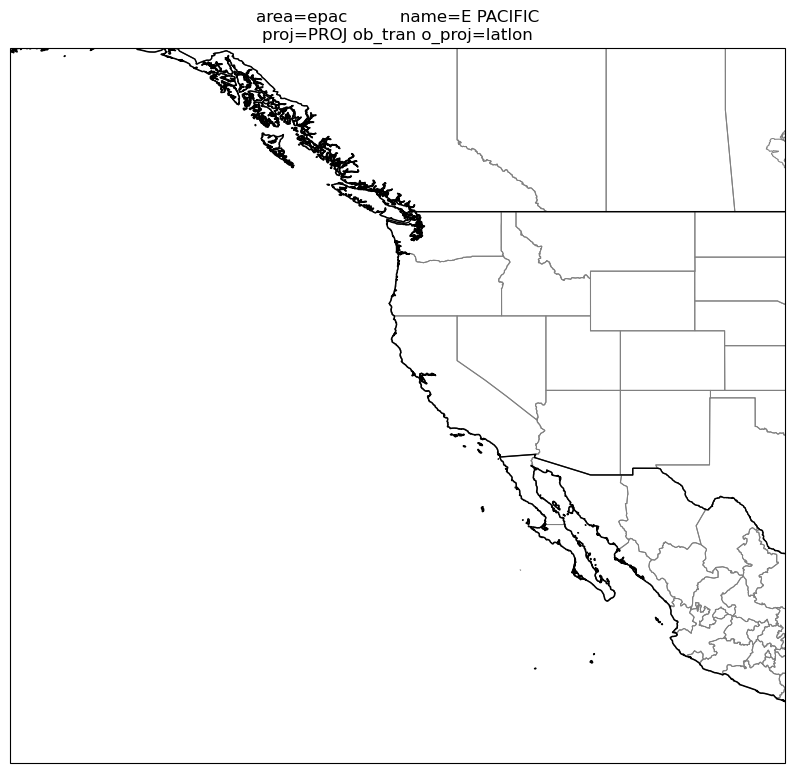

In [5]:
# Select the area string
area = 'epac'

# Get the extent and project for the selected area
extent = named_areas[area].bounds
proj = named_areas[area].projection

# Plot a simple figure for the selected area
plt.figure(1, figsize=(10, 10))
ax = plt.subplot(111, projection=proj)
ax.set_extent(extent, ccrs.PlateCarree())
ax.add_feature(cfeature.STATES.with_scale('10m'), edgecolor='grey', linewidth=0.75)
ax.add_feature(cfeature.COASTLINE.with_scale('10m'), linewidth=1.1)
ax.add_feature(cfeature.BORDERS.with_scale('10m'), edgecolor='black')
ax.set_title(f'area={area}          name={named_areas[area].description}'
             f'\nproj={proj.coordinate_operation.method_name}')
plt.show()


# Examaple Using Declarative Syntax

Here is an example using a predefined area with the declarative plotting syntax for plotting
some surface observations.

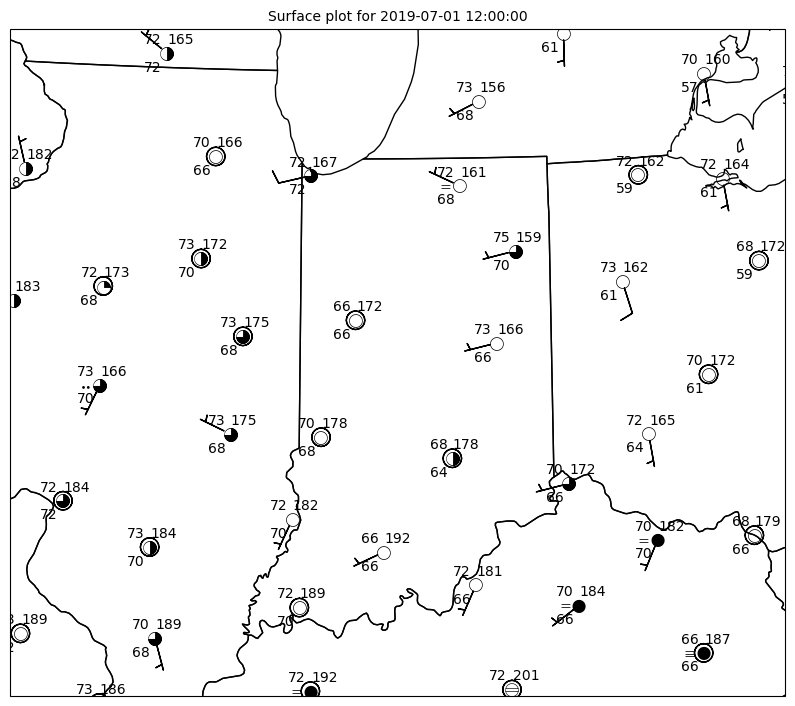

In [6]:
# Set the observation time
obs_time = datetime(2019, 7, 1, 12)

# Read in data
df = metar.parse_metar_file(get_test_data('metar_20190701_1200.txt', False), year=2019,
                            month=7)

# Plot desired data
obs = declarative.PlotObs()
obs.data = df
obs.time = obs_time
obs.time_window = timedelta(minutes=15)
obs.level = None
obs.fields = ['cloud_coverage', 'air_temperature', 'dew_point_temperature',
              'air_pressure_at_sea_level', 'current_wx1_symbol']
obs.plot_units = [None, 'degF', 'degF', None, None]
obs.locations = ['C', 'NW', 'SW', 'NE', 'W']
obs.formats = ['sky_cover', None, None, lambda v: format(v * 10, '.0f')[-3:],
               'current_weather']
obs.reduce_points = 0.75
obs.vector_field = ['eastward_wind', 'northward_wind']

# Panel for plot with Map features
panel = declarative.MapPanel()
panel.layout = (1, 1, 1)
panel.projection = 'area'
panel.area = 'in+'
panel.layers = ['states']
panel.title = f'Surface plot for {obs_time}'
panel.plots = [obs]

# Bringing it all together
pc = declarative.PanelContainer()
pc.size = (10, 10)
pc.panels = [panel]

pc.show()